In [1]:
import zstandard as zstd
import shutil
import os

def decompress_zst(input_file, output_file, max_samples):
    with open(input_file, 'rb') as compressed_file:
        decomp = zstd.ZstdDecompressor()
        with open(output_file, 'wb') as output:
            total_samples = 0
            for chunk in decomp.read_to_iter(compressed_file):
                output.write(chunk)
                total_samples += chunk.count(b'\n')
                if total_samples >= max_samples:
                    break

# List of input files
input_files = ['/Users/shivanipaunikar/Downloads/Project- crypto/Cardano/CC.zst', '/Users/shivanipaunikar/Downloads/Project- crypto/Cardano/CS.zst']

# Output directory where decompressed files will be stored
output_directory = '/Users/shivanipaunikar/Downloads/Project- crypto/output'

# Maximum number of samples you want to use
max_samples = 5000

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Loop through each input file and decompress
for input_file in input_files:
    # Generate the output file path by removing the .zst extension and adding .json
    output_file = os.path.join(output_directory, os.path.splitext(os.path.basename(input_file))[0] + '.json')
    
    print(f"Processing: {input_file}")
    
    # Decompress the input file, limiting to max_samples, and save it to the output file path
    decompress_zst(input_file, output_file, max_samples)
    
    print(f"Completed: {input_file} -> {output_file}")

print("All files processed.")


Processing: /Users/shivanipaunikar/Downloads/Project- crypto/Cardano/CC.zst
Completed: /Users/shivanipaunikar/Downloads/Project- crypto/Cardano/CC.zst -> /Users/shivanipaunikar/Downloads/Project- crypto/output/CC.json
Processing: /Users/shivanipaunikar/Downloads/Project- crypto/Cardano/CS.zst
Completed: /Users/shivanipaunikar/Downloads/Project- crypto/Cardano/CS.zst -> /Users/shivanipaunikar/Downloads/Project- crypto/output/CS.json
All files processed.


In [2]:
import pandas as pd
import json
import os

# Define the output directory where the JSON files were decompressed
output_directory = '/Users/shivanipaunikar/Downloads/Project- crypto/output'

# Function to fix JSON syntax errors
def fix_json_syntax(input_file, output_file):
    with open(input_file, 'r') as input_json, open(output_file, 'w') as output_json:
        for line in input_json:
            try:
                json_obj = json.loads(line)
                corrected_line = json.dumps(json_obj) + '\n'
                output_json.write(corrected_line)
            except json.JSONDecodeError as e:
                # Handle JSON syntax errors here or simply skip problematic lines
                print(f"Skipping line due to JSON syntax error: {line.strip()}")
                continue

# Specify your input and output file paths for fixing 'Ds.json' syntax
input_file_path_CS = os.path.join(output_directory, 'CS.json')
output_file_path_CS = os.path.join(output_directory, 'CS_fixed.json')

# Call the function to fix JSON syntax errors in 'Bs.json'
fix_json_syntax(input_file_path_CS, output_file_path_CS)

# Specify your input and output file paths for fixing 'Bc.json' syntax
input_file_path_CC = os.path.join(output_directory, 'CC.json')
output_file_path_CC = os.path.join(output_directory, 'CC_fixed.json')

# Call the function to fix JSON syntax errors in 'Bc.json'
fix_json_syntax(input_file_path_CC, output_file_path_CC)

# Define a function to read JSON data line by line
def read_json_lines(file_path):
    with open(file_path, 'r') as file:
        for line in file:
            yield json.loads(line)

# Use os.path.join to construct file paths
submission_data = list(read_json_lines(output_file_path_CS))  
comment_data = list(read_json_lines(output_file_path_CC))  

# Create DataFrames
submission_df = pd.DataFrame(submission_data)
comment_df = pd.DataFrame(comment_data)

# Filter for Dogecoin-related data (you may need to adjust the filter)
Cardano_submissions = submission_df[submission_df['title'].str.contains('Cardano', case=False, na=False)]
Cardano_comments = comment_df[comment_df['body'].str.contains('Cardano', case=False, na=False)]

# Sample 5000 observations with replacement
Cardano_submissions_sample = Cardano_submissions.sample(n=5000, replace=True)
Cardano_comments_sample = Cardano_comments.sample(n=5000, replace=True)

# Export to CSV
Cardano_submissions_sample.to_csv('Cardano_submissions_sample.csv', index=False)
Cardano_comments_sample.to_csv('Cardano_comments_sample.csv', index=False)


Skipping line due to JSON syntax error: {"archived":false,"author":"SnowflakeXY","author_flair_css_class":null,"author_flair_text":null,"brand_safe":true,"contest_mode":false,"created_utc":1516690253,"distinguished":null,"domain":"youtube.com","edited":false,"gilded":0,"hidden":false,"hide_score":false,"id":"7scmzc","is_crosspostable":false,"is_reddit_media_domain":false,"is_self":false,"is_video":false,"link_flair_css_class":null,"link_flair_text":null,"locked":false,"media":{"oembed":{"author_name":"Cedric Dahl","author_url":"https://www.youtube.com/user/inspiredeye","height":338,"html":"&lt;iframe width=\"600\" height=\"338\" src=\"https://www.youtube.com/embed/hVBi8rVkQms?feature=oembed&amp;enablejsapi=1\" frameborder=\"0\" allow=\"autoplay; encrypted-media\" allowfullscreen&gt;&lt;/iframe&gt;","provider_name":"YouTube","provider_url":"https://www.youtube.com/","thumbnail_height":360,"thumbnail_url":"https://i.ytimg.com/vi/hVBi8rVkQms/hqdefault.jpg","thumbnail_width":480,"title":"\

In [3]:
# Load the CSV files
Cardano_submissions_df = pd.read_csv('Cardano_submissions_sample.csv')
Cardano_comments_df = pd.read_csv('Cardano_comments_sample.csv')


In [4]:
# Display the columns of the DataFrame
print("Columns in Cardanon_submissions_df:")
print(Cardano_submissions_df.columns)

# Display a sample of the DataFrame
print("Sample data in Cardano_submissions_df:")
print(Cardano_submissions_df.head())

# Repeat the same for Dogecoin_comments_df if needed
print("Columns in Cardano_comments_df:")
print(Cardano_comments_df.columns)

print("Sample data in Cardano_comments_df:")
print(Cardano_comments_df.head())


Columns in Cardanon_submissions_df:
Index(['url', 'link_flair_css_class', 'preview', 'brand_safe', 'secure_media',
       'suggested_sort', 'link_flair_text', 'quarantine', 'domain',
       'subreddit', 'num_comments', 'stickied', 'over_18', 'created_utc',
       'locked', 'author_flair_text', 'title', 'archived', 'retrieved_on',
       'is_self', 'contest_mode', 'gilded', 'author_flair_css_class',
       'hide_score', 'author', 'id', 'media', 'subreddit_id',
       'secure_media_embed', 'score', 'hidden', 'view_count',
       'thumbnail_height', 'spoiler', 'media_embed', 'edited', 'post_hint',
       'thumbnail', 'thumbnail_width', 'can_gild', 'selftext', 'permalink',
       'distinguished', 'is_video', 'approved_at_utc', 'banned_at_utc',
       'can_mod_post', 'is_crosspostable', 'num_crossposts',
       'parent_whitelist_status', 'whitelist_status', 'is_reddit_media_domain',
       'pinned', 'subreddit_type', 'author_cakeday', 'crosspost_parent',
       'crosspost_parent_list', 'mod

In [5]:
import pandas as pd

# Load the data into DataFrames (assuming you already have them loaded)
Cardano_submissions_df = pd.read_csv('Cardano_submissions_sample.csv')
Cardano_comments_df = pd.read_csv('Cardano_comments_sample.csv')

# Convert 'created_utc' columns to datetime objects
Cardano_submissions_df['created_utc'] = pd.to_datetime(Cardano_submissions_df['created_utc'], unit='s')
Cardano_comments_df['created_utc'] = pd.to_datetime(Cardano_comments_df['created_utc'], unit='s')

# Calculate the range of dates available
date_range_submissions = Cardano_submissions_df['created_utc'].min(), Cardano_submissions_df['created_utc'].max()
date_range_comments = Cardano_comments_df['created_utc'].min(), Cardano_comments_df['created_utc'].max()

print("Range of dates available in Cardano_submissions_df:", date_range_submissions)
print("Range of dates available in Cardano_comments_df:", date_range_comments)

# Calculate the number of posts, comments, and authors for each day
posts_per_day_submissions = Cardano_submissions_df.groupby(Cardano_submissions_df['created_utc'].dt.date).size()
comments_per_day = Cardano_comments_df.groupby(Cardano_comments_df['created_utc'].dt.date).size()
unique_authors_per_day_submissions = Cardano_submissions_df.groupby(Cardano_submissions_df['created_utc'].dt.date)['author'].nunique()

# Display the results
print("\nNumber of posts per day in Cardano_submissions_df:")
print(posts_per_day_submissions)
print("\nNumber of comments per day in Cardano_comments_df:")
print(comments_per_day)
print("\nNumber of unique authors per day in Cardano_submissions_df:")
print(unique_authors_per_day_submissions)


Range of dates available in Cardano_submissions_df: (Timestamp('2017-04-19 10:46:04'), Timestamp('2018-01-23 04:31:05'))
Range of dates available in Cardano_comments_df: (Timestamp('2017-07-18 13:14:24'), Timestamp('2017-11-29 04:07:26'))

Number of posts per day in Cardano_submissions_df:
created_utc
2017-04-19     2
2017-05-10     6
2017-05-11     2
2017-05-19     4
2017-06-14     3
              ..
2018-01-19    38
2018-01-20    51
2018-01-21    35
2018-01-22    43
2018-01-23    11
Length: 129, dtype: int64

Number of comments per day in Cardano_comments_df:
created_utc
2017-07-18     20
2017-09-04      5
2017-09-12     10
2017-09-29      5
2017-09-30      5
             ... 
2017-11-25     65
2017-11-26     53
2017-11-27    195
2017-11-28    563
2017-11-29    132
Length: 65, dtype: int64

Number of unique authors per day in Cardano_submissions_df:
created_utc
2017-04-19     1
2017-05-10     1
2017-05-11     1
2017-05-19     1
2017-06-14     1
              ..
2018-01-19     8
2018-

# Topic Modeling

In [6]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim import models
import gensim.corpora as corpora
import gensim

In [7]:
# Load the data into DataFrames (assuming you already have them loaded)
Cardano_submissions_df = pd.read_csv('Cardano_submissions_sample.csv')
Cardano_comments_df = pd.read_csv('Cardano_comments_sample.csv')

# Convert 'created_utc' columns to datetime objects
Cardano_submissions_df['created_utc'] = pd.to_datetime(Cardano_submissions_df['created_utc'], unit='s')
Cardano_comments_df['created_utc'] = pd.to_datetime(Cardano_comments_df['created_utc'], unit='s')

# Combine comments and submissions text
Cardano_text = Cardano_submissions_df['selftext'].dropna().tolist() + Cardano_comments_df['body'].dropna().tolist()


In [8]:
# Text preprocessing
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum()]
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

Cardano_text = [preprocess_text(text) for text in Cardano_text]


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shivanipaunikar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shivanipaunikar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000)

In [10]:
# Apply TF-IDF vectorization
Cardano_tfidf = tfidf_vectorizer.fit_transform([' '.join(tokens) for tokens in Cardano_text])

In [11]:
pip install gensim matplotlib pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [12]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import matplotlib.pyplot as plt

# Assuming you have a list of preprocessed tokens called 'bitcoin_text'
# You can replace 'bitcoin_text' with your actual data
dictionary = Dictionary([tokens for tokens in Cardano_text])
corpus = [dictionary.doc2bow(tokens) for tokens in Cardano_text]

# Perform LDA topic modeling
lda_model_Cardano = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=2)

In [13]:
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model_Cardano, texts=Cardano_text, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f'Coherence Score: {coherence_lda:.4f}')


Coherence Score: 0.4128


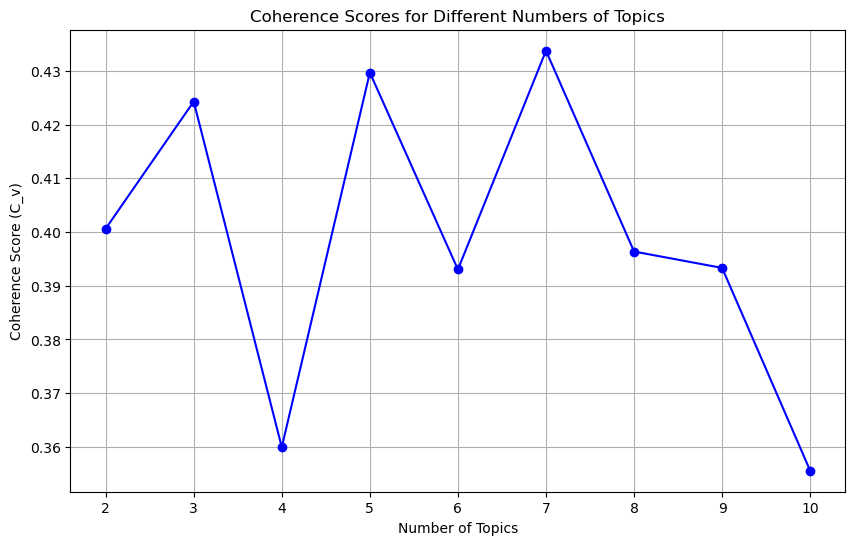

In [14]:
# Define a range of topic numbers to test
topics_range = range(2, 11)
coherence_scores = []

# Calculate coherence scores for different numbers of topics
for num_topics in topics_range:
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=2)
    coherence_model = CoherenceModel(model=lda_model, texts=Cardano_text, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)

# Plot the coherence scores
plt.figure(figsize=(10, 6))
plt.plot(topics_range, coherence_scores, marker='o', linestyle='-', color='b')
plt.title('Coherence Scores for Different Numbers of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score (C_v)')
plt.xticks(topics_range)
plt.grid(True)
plt.show()


In [15]:
# Print the topics generated by the LDA model
topics = lda_model_Cardano.print_topics(num_words=7)  # You can adjust the number of words per topic
for topic in topics:
    print(topic)


(0, '0.039*"cardano" + 0.026*"http" + 0.018*"amp" + 0.012*"wa" + 0.011*"wallet" + 0.009*"ada" + 0.008*"sometimes"')
(1, '0.024*"cardano" + 0.019*"ada" + 0.014*"coin" + 0.011*"would" + 0.010*"market" + 0.009*"people" + 0.009*"bitcoin"')
(2, '0.040*"cardano" + 0.012*"platform" + 0.011*"ha" + 0.011*"also" + 0.008*"http" + 0.007*"think" + 0.007*"blockchain"')
(3, '0.044*"cardano" + 0.011*"project" + 0.010*"ha" + 0.009*"roadmap" + 0.009*"year" + 0.008*"like" + 0.008*"also"')
(4, '0.037*"cardano" + 0.020*"coin" + 0.018*"year" + 0.013*"removed" + 0.011*"5" + 0.010*"ada" + 0.009*"like"')


# Sentiment Analysis

In [16]:
from textblob import TextBlob

Cardano_text = Cardano_submissions_df['selftext'].dropna().tolist() + Cardano_comments_df['body'].dropna().tolist()

# Preprocess the text data (if you haven't done this already)
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum()]
    tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(tokens)  # Join tokens into a single string

Cardano_text = [preprocess_text(text) for text in Cardano_text]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shivanipaunikar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shivanipaunikar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
# Example preprocessing using NLTK
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

# Define a function to preprocess text
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    tokens = [word for word in tokens if word.lower() not in stopwords.words('english')]
    
    # Other text cleaning steps (e.g., removing punctuation, stemming) can be added
    
    return " ".join(tokens)  # Convert tokens back to text

# Apply preprocessing to your text data
Cardano_comments_df['cleaned_text'] = Cardano_comments_df['body'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shivanipaunikar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shivanipaunikar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:
# Define a function to get sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity

    if polarity > 0.1:
        return "positive"
    elif polarity < -0.1:
        return "negative"
    else:
        return "neutral"

In [20]:
# Apply sentiment analysis to your preprocessed text data
sentiments = [get_sentiment(text) for text in Cardano_text]

In [21]:
# Create a DataFrame to store sentiments (optional)
sentiments_df = pd.DataFrame({'Sentiment': sentiments})

In [22]:
# Print or analyze the sentiment results as needed
print(sentiments_df['Sentiment'].value_counts())  # Display sentiment counts

neutral     4619
positive    3069
negative     411
Name: Sentiment, dtype: int64


In [23]:
# Assuming you have already performed sentiment analysis and stored results in 'sentiments' list
# Combine both comments and submissions text into a single list
Cardano_text = Cardano_submissions_df['selftext'].dropna().tolist() + Cardano_comments_df['body'].dropna().tolist()


# Print the first few comments and submissions with their sentiments
for i, (text, sentiment) in enumerate(zip(Cardano_text, sentiments)):
    if i >= 10:  # Print the first 10 (5 comments + 5 submissions)
        break
    if i < 5:
        print(f"Comment {i + 1}:")
    else:
        print(f"Submission {i - 4}:")
    print("Text:", text)
    print("Sentiment:", sentiment)
    print()


Comment 1:
Text: [removed]
Sentiment: neutral

Comment 2:
Text: Hi guys,

i would like to buy cardano buy it seem that bittrex is closed for new registrations. Is there any way to buy cardano without an BTC/ETH Exchange but directly for USD?

Hope someone can help me :)
Sentiment: neutral

Comment 3:
Text: Before you read my question please note that I am not an expert in blockchain and others area, so my question might seem noobish.

So I researched Cardano a bit and I like the idea behind it, but looking at the transaction fees, they seem a bit excessive to me. 

The equation is this: 0.155381 ADA + 0.000043946 ADA/byte

Looking at the first term as it is the major source of cost (set aside the very large transactions). If ADA cost 1 USD, the transaction cost is 0,15 USD regardless of what you buy with it (a drink, a sandwich, a car). But if the market cap goes at 10 times than the current cc. 25 billion. (assuming massive adoption, etc, than the transaction fee will be at least 1,5 

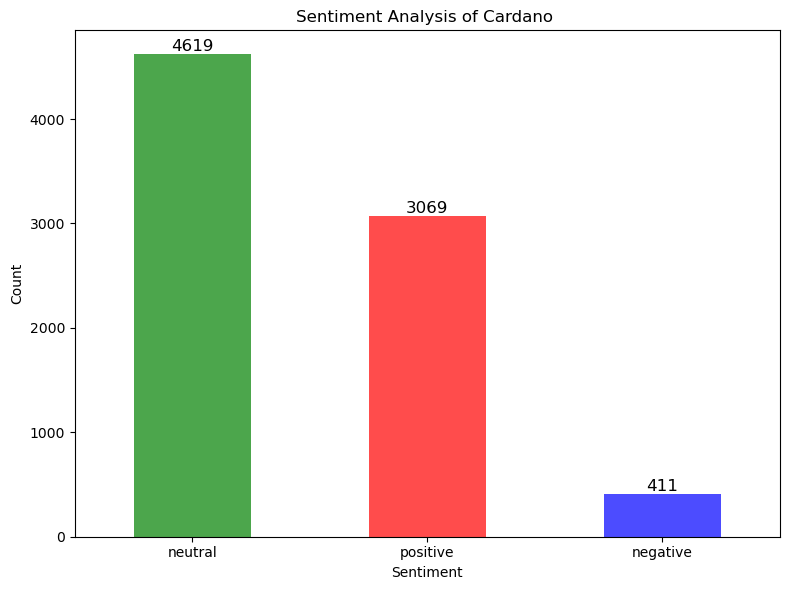

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have already performed sentiment analysis and have a DataFrame 'sentiments_df'
# with a 'Sentiment' column containing sentiment labels (positive, negative, neutral)

# Count the occurrences of each sentiment label
sentiment_counts = sentiments_df['Sentiment'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'], alpha=0.7)
plt.title('Sentiment Analysis of Cardano ')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Annotate the bars with counts
for i, count in enumerate(sentiment_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12)

# Show the plot
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Emotion Analysis

In [25]:
pip install transformers torch

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch

# Load the pre-trained emotion classification model and tokenizer
model_name = "michellejieli/emotion_text_classifier"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Combine both comments and submissions text into a single list
Cardano_text = Cardano_submissions_df['selftext'].dropna().tolist() + Cardano_comments_df['body'].dropna().tolist()


In [ ]:
def get_emotion(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        logits = model(**inputs).logits
    predicted_class = torch.argmax(logits, dim=1).item()
    
    # Define the emotion labels corresponding to model output
    emotion_labels = ["anger", "fear", "joy", "sadness", "surprise"]
    return emotion_labels[predicted_class]

In [ ]:
Cardano_combined_df['emotion'] = combined_text.apply(get_emotion)